In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import xarray as xr

import regionmask

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import netCDF4

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

# Import data and process

In [2]:
ds_egrid = xr.open_dataset('/net/fs03/d1/emfreese/grid_model/annual_emissions/inventory_power_plants_egrid.nc')#,chunks={'time': 365, 'lat': 40, 'lon': 90})
ds_normal = xr.open_dataset('/net/fs03/d1/emfreese/grid_model/annual_emissions/inventory_power_plants.nc')#,chunks={'time': 365, 'lat': 40, 'lon': 90})
ds_nonuc = xr.open_dataset('/net/fs03/d1/emfreese/grid_model/annual_emissions/inventory_power_plants_no-nuclear.nc')#,chunks={'time': 365, 'lat': 40, 'lon': 90})


datasets = [ds_normal,ds_egrid,ds_nonuc]
emission_names = ['NO', 'NO2', 'SO2']



In [9]:
ds_egrid.isel(time = 0)

<xarray.Dataset>
Dimensions:  (lat: 400, lon: 900)
Coordinates:
    time     datetime64[ns] 2017-01-01
  * lat      (lat) float64 20.05 20.15 20.25 20.35 ... 59.65 59.75 59.85 59.95
  * lon      (lon) float64 -139.9 -139.8 -139.8 -139.7 ... -50.25 -50.15 -50.05
Data variables:
    NO       (lat, lon) float64 ...
    NO2      (lat, lon) float64 ...
    SO2      (lat, lon) float64 ...
Attributes:
    Title:        Hourly CH power plant inventory
    Conventions:  COARDS
    History:      Created 2020-02-14
    Contact:      emfreese@mit.edu

In [7]:
for ds in datasets:
    ds.attrs['Contact'] = 'emfreese@mit.edu'
    for emis in emission_names:
        #ds[emis] = ds[emis]* 3600 *24 #kg/m2/s *s/day = kg/m2/day
        ds[emis].attrs['units'] = 'kg/m2/sec'
        ds[emis].attrs['long_name'] = f'{emis} emissions from power plants'

In [12]:
levels_NO = np.arange(.4, .8, .01)


AttributeError: '_PlotMethods' object has no attribute 'scatter'

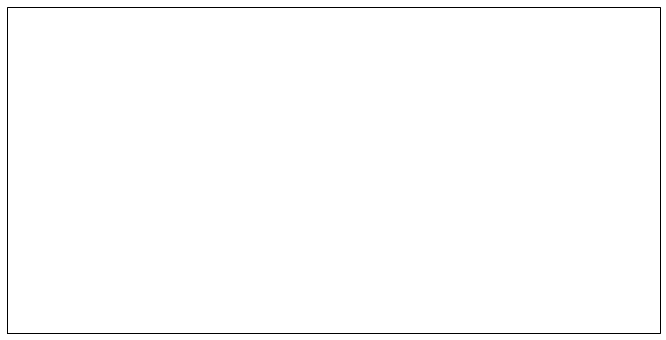

In [20]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_nonuc.isel(time = 0)['NO'].plot.scatter('bo',ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat')#,levels = levels_NO, cmap = 'tab20b' )
ax.coastlines()

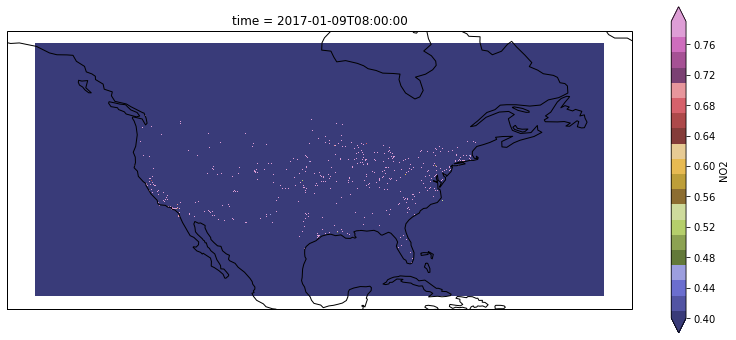

In [55]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_normal.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat',levels = levels_NO, cmap = 'tab20b' )
ax.coastlines()

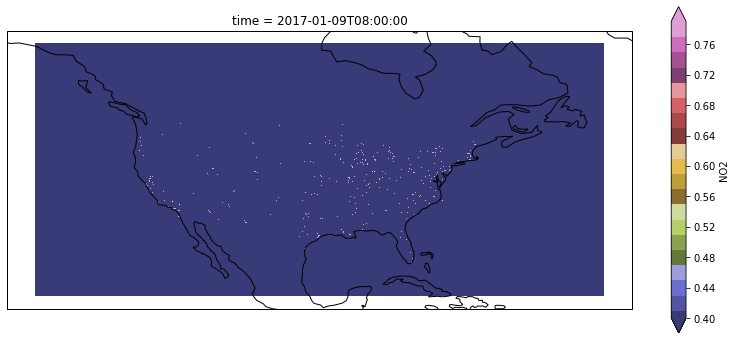

In [56]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_egrid.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat',levels = levels_NO, cmap = 'tab20b' )
ax.coastlines()